In [ ]:
!pip install pandas-datareader
pip install yfinance


In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf


In [ ]:
symbol = 'TSLA'
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 11, 1)

In [ ]:
# Fetch data from Yahoo Finance
df_tesla = yf.download(symbol, start=start_date, end=end_date)

# Print the first few rows of the DataFrame
print(df_tesla.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  20.799999  21.474001  20.733334  21.368668  21.368668   65283000
2018-01-03  21.400000  21.683332  21.036667  21.150000  21.150000   67822500
2018-01-04  20.858000  21.236668  20.378668  20.974667  20.974667  149194500
2018-01-05  21.108000  21.149332  20.799999  21.105333  21.105333   68868000
2018-01-08  21.066668  22.468000  21.033333  22.427334  22.427334  147891000


In [ ]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94881200
2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200
2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300


<Axes: xlabel='Date'>

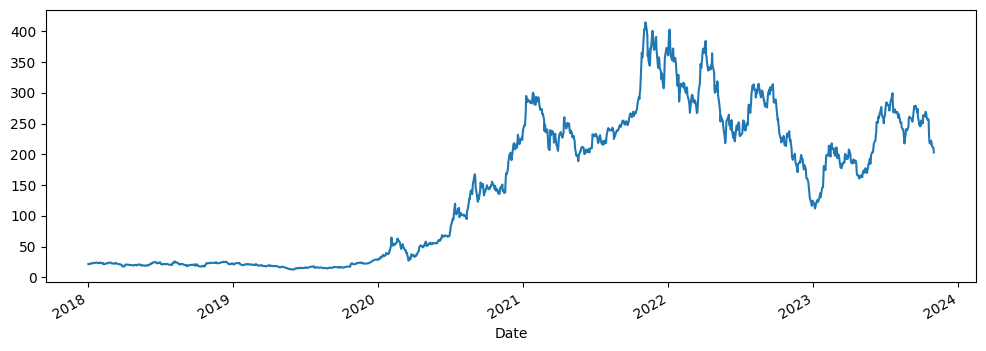

In [ ]:
df_tesla['High'].plot(figsize=(12,4))

In [ ]:
df_tesla.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='Date', length=1468, freq=None)

In [ ]:
index=df_tesla.loc['2022-01-01':'2023-11-01'].index
share_open=df_tesla.loc['2022-01-01':'2023-11-01']['Open']

In [ ]:
share_open

Date
2022-01-03    382.583344
2022-01-04    396.516663
2022-01-05    382.216675
2022-01-06    359.000000
2022-01-07    360.123322
                 ...    
2023-10-25    215.880005
2023-10-26    211.320007
2023-10-27    210.600006
2023-10-30    209.279999
2023-10-31    196.119995
Name: Open, Length: 460, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

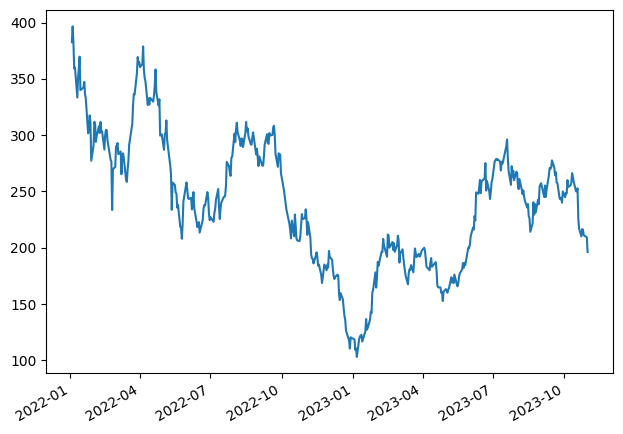

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [ ]:
df_tesla=df_tesla.reset_index()

In [ ]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1468 non-null   datetime64[ns]
 1   Open       1468 non-null   float64       
 2   High       1468 non-null   float64       
 3   Low        1468 non-null   float64       
 4   Close      1468 non-null   float64       
 5   Adj Close  1468 non-null   float64       
 6   Volume     1468 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.4 KB


In [ ]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [ ]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [ ]:
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,108.099998,83166000


In [ ]:
df_tesla.resample(rule='A').max()#rule A means Year and Frequency

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,296.040009,299.290009,289.519989,293.339996,293.339996,306590600


<Axes: xlabel='Date'>

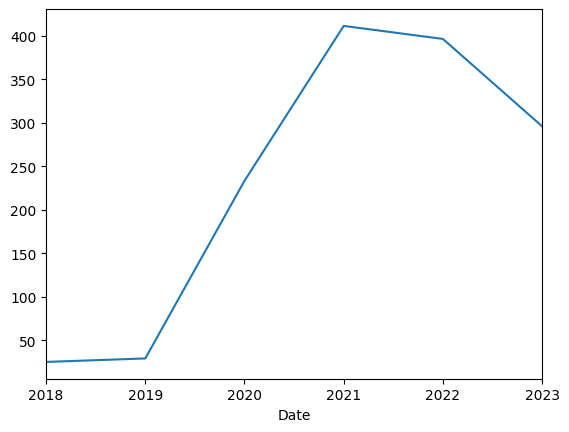

In [ ]:
df_tesla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

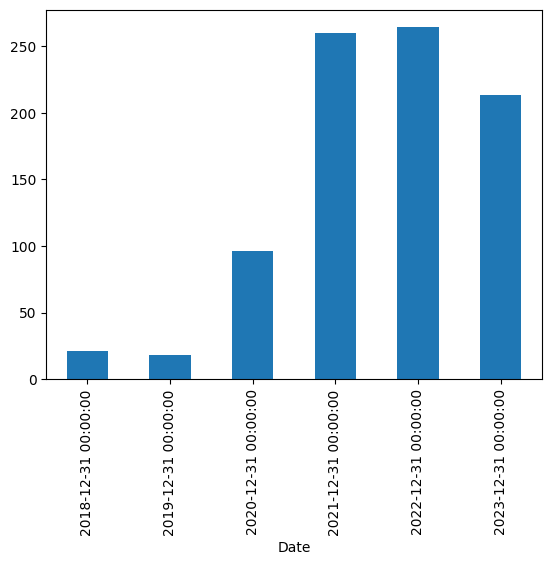

In [ ]:

##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

In [ ]:
df_tesla['High'].rolling(11).max().head(20)


Date
2018-01-02          NaN
2018-01-03          NaN
2018-01-04          NaN
2018-01-05          NaN
2018-01-08          NaN
2018-01-09          NaN
2018-01-10          NaN
2018-01-11          NaN
2018-01-12          NaN
2018-01-16          NaN
2018-01-17    23.266666
2018-01-18    23.486668
2018-01-19    23.486668
2018-01-22    23.855333
2018-01-23    24.033333
2018-01-24    24.033333
2018-01-25    24.033333
2018-01-26    24.033333
2018-01-29    24.033333
2018-01-30    24.033333
Name: High, dtype: float64

In [ ]:
df_tesla.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [ ]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [ ]:
df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,NaN
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,NaN
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,NaN
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,NaN
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,NaN
2018-01-09,22.344000,22.586666,21.826668,22.246000,22.246000,107199000,NaN
2018-01-10,22.146667,22.466667,22.000000,22.320000,22.320000,64648500,NaN
2018-01-11,22.349333,22.987333,22.217333,22.530001,22.530001,99682500,NaN
2018-01-12,22.575333,22.694000,22.244667,22.414667,22.414667,72376500,NaN


<Axes: xlabel='Date'>

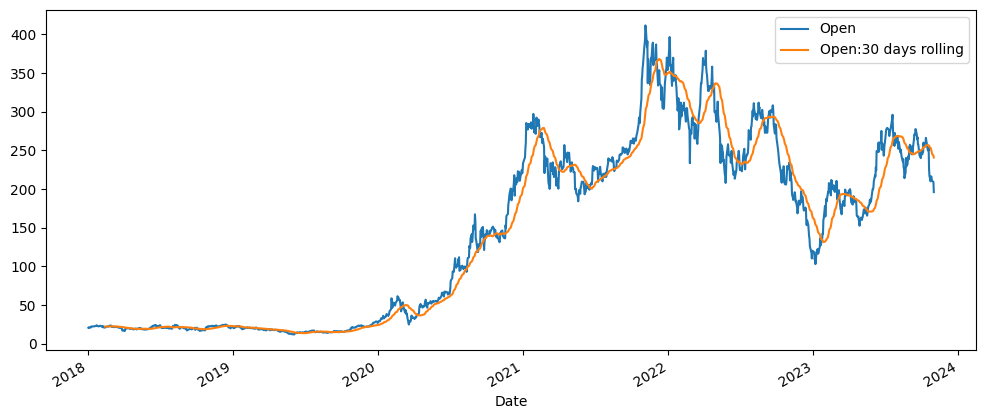

In [ ]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))